# Project: Flight Price Prediction

# Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [3]:
train=pd.read_excel(r"F:\Data Analyst\Project\Dataset\Data_Train.xlsx")
test=pd.read_excel(r"F:\Data Analyst\Project\Dataset\Test_set.xlsx")

In [4]:
train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [5]:
test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [6]:
# Append Data
df=train.append(test)

In [7]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN


# Understanding Data

In [8]:
# to show first five rows
df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [9]:
# to show last 5 rows
df.tail(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [10]:
# to show random rows
df.sample(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
4823,Vistara,9/06/2019,Kolkata,Banglore,CCU → DEL → BLR,07:10,23:25,16h 15m,1 stop,No info,9345.0
138,Jet Airways,24/05/2019,Banglore,Delhi,BLR → DEL,06:00,08:45,2h 45m,non-stop,In-flight meal not included,4030.0
1114,Air India,3/05/2019,Banglore,Delhi,BLR → DEL,06:10,08:55,2h 45m,non-stop,No info,5228.0
1341,Multiple carriers,1/03/2019,Delhi,Cochin,DEL → BOM → COK,19:00,01:35 02 Mar,6h 35m,1 stop,No info,23533.0
6497,IndiGo,15/03/2019,Kolkata,Banglore,CCU → BLR,05:30,08:20,2h 50m,non-stop,No info,4148.0


In [11]:
# to show columns 
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [12]:
# to show data shape
df.shape

(13354, 11)

In [13]:
# to show data types
df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

In [14]:
# to show size of dataset
df.size

146894

In [15]:
# len of data set
len(df)

13354

In [16]:
# to show basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


In [17]:
#basic descriptive statistics
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


# Data Cleaning & Feature Enginnering

In [18]:
# check duplicated
df.duplicated().sum()

246

In [20]:
df[df.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376.0
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231.0
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392.0
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368.0
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303.0
...,...,...,...,...,...,...,...,...,...,...,...
2536,Air India,3/06/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 04 Jun,21h 15m,2 stops,No info,NaN
2553,Jet Airways,15/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,19:00,13h 30m,2 stops,No info,NaN
2560,Multiple carriers,3/06/2019,Delhi,Cochin,DEL → BOM → COK,13:00,01:30 04 Jun,12h 30m,1 stop,No info,NaN
2582,Air India,12/05/2019,Kolkata,Banglore,CCU → BOM → GOI → BLR,16:50,05:35 13 May,12h 45m,2 stops,No info,NaN


In [21]:
#drop duplicate
df.drop_duplicates()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN


In [22]:
# check missing value
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

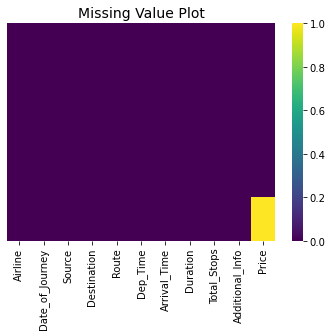

In [25]:
# plot missing value
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')
plt.title('Missing Value Plot',fontsize=14);

In [29]:
# percentage of missing value
pct=(df.isnull().sum()/len(df))*100
pct.sort_values(ascending=False)

Price              20.001498
Route               0.007488
Total_Stops         0.007488
Airline             0.000000
Date_of_Journey     0.000000
Source              0.000000
Destination         0.000000
Dep_Time            0.000000
Arrival_Time        0.000000
Duration            0.000000
Additional_Info     0.000000
dtype: float64

In [35]:
# handeling missing value price colums
mean=df['Price'].mean()
df['Price']=df['Price'].fillna(mean)

In [41]:
# handelling missing value total_stops columns
mode=df['Total_Stops'].mode()[0]
df['Total_Stops']=df['Total_Stops'].fillna(mode)

In [46]:
#handeling Missing value route columns
mode=df['Route'].mode()[0]
df['Route']=df['Route'].fillna(mode)

In [50]:
# Airline Columns rename
df.rename(columns={'Airline':'Airline_Name'},inplace=True)

In [53]:
# change date format
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])

In [62]:
# extract day,month,year
df['Year']=df['Date_of_Journey'].dt.year
df['Month']=df['Date_of_Journey'].dt.month
df['Day']=df['Date_of_Journey'].dt.day
df['Month_Name']=df['Date_of_Journey'].dt.month_name()
df['Day_Name']=df['Date_of_Journey'].dt.day_name()

In [65]:
df1=df.copy()

In [71]:
#split Duration Columns
df1['Duration_Hour']=df1['Duration'].str.split(' ').str[0].str.replace('h','')
df1['Duration_Min']=df1['Duration'].str.split(' ').str[1].str.replace('m','')

In [74]:
#split Duration Columns
df1['Dep_Hour']=df1['Dep_Time'].str.split(':').str[0]
df1['Dep_Min']=df1['Dep_Time'].str.split(':').str[1]

In [78]:
df1['Arrival_Time']=df1['Arrival_Time'].str.split(' ').str[0]

In [80]:
#split Arrival Time Columns
df1['Arrival_Hour']=df1['Arrival_Time'].str.split(':').str[0]
df1['Arrival_Min']=df1['Arrival_Time'].str.split(':').str[1]

In [82]:
df=df1.copy()

In [86]:
#drop unwanted Columns
df.drop(columns=['Date_of_Journey','Dep_Time','Arrival_Time','Duration','Duration_Min'],axis=1,inplace=True)

In [87]:
df.head(5)

,Airline_Name,Source,Destination,Route,Total_Stops,Additional_Info,Price,Year,Month,Day,Month_Name,Day_Name,Duration_Hour,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897.0,2019,3,24,March,Sunday,2,22,20,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662.0,2019,1,5,January,Saturday,7,05,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882.0,2019,9,6,September,Friday,19,09,25,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218.0,2019,12,5,December,Thursday,5,18,05,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302.0,2019,1,3,January,Thursday,4,16,50,21,35


In [95]:
# check Total Unique Columns
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [92]:
# Replace Duration Hour Columns
df['Duration_Hour']=df['Duration_Hour'].str.replace('m','')

In [93]:
# change datatype
df['Duration_Hour']=df['Duration_Hour'].astype('int')
df['Dep_Hour']=df['Dep_Hour'].astype('int')
df['Dep_Min']=df['Dep_Min'].astype('int')
df['Arrival_Hour']=df['Arrival_Hour'].astype('int')
df['Arrival_Min']=df['Arrival_Min'].astype('int')

In [99]:
df=df1.copy()

In [97]:
# mapping Total Stops Columns
df1['Total_Stops']=df1['Total_Stops'].map({'non-stop':0,'2 stops':2,'1 stop':1,'3 stops':3,'4 stops':4})

In [100]:
# export data csv format
df.to_csv(r"F:\Data Analyst\Project\Dataset\flight_pred_clean.csv")

In [102]:
# drop route columns
df.drop(columns=['Route'],axis=1,inplace=True)

In [99]:
def info(value):
    if 'No info' in value or 'No Info' in value:
        return 'No Info'
    elif 'Change airports' in value:
        return 'Change airports'
    elif 'Business class' in value:
        return 'Business class'
    elif 'Red-eye flight' in value:
        return 'Red-eye flight'
    else:
        return 'Other'

In [ ]:
df['Info']=df['Additional_Info'].apply(info)

In [100]:
df.head(5)

,Airline_Name,Source,Destination,Route,Total_Stops,Price,Year,Month,Day,Month_Name,Day_Name,Duration_Hour,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,3897.0,2019,3,24,March,Sunday,2,22,20,1,10,No Info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,7662.0,2019,1,5,January,Saturday,7,5,50,13,15,No Info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,13882.0,2019,9,6,September,Friday,19,9,25,4,25,No Info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,6218.0,2019,12,5,December,Thursday,5,18,5,23,30,No Info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,13302.0,2019,1,3,January,Thursday,4,16,50,21,35,No Info


In [ ]:
df.to_csv(r"F:\Data Analyst\Project\Dataset\flight_data_clean.csv")

# Exploratory Data Analysis

Target Columns: Price

In [12]:
df=pd.read_csv('flight_pred_clean.csv')
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)


In [13]:
cat=df.select_dtypes(include=object).columns
num=df.select_dtypes(exclude=object).columns

# Univariate Analysis:
    

2.0264572112744217


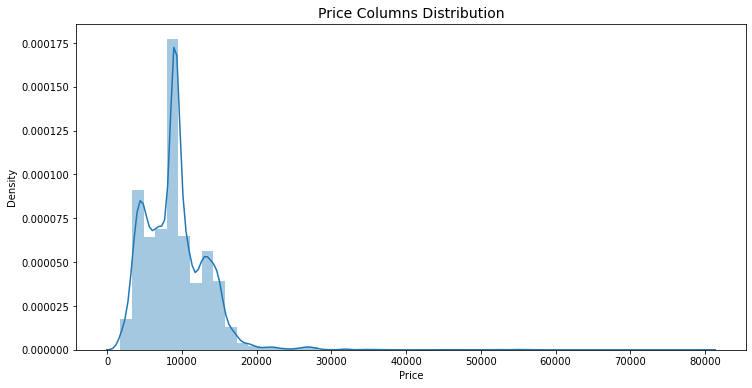

In [30]:
#price column
print(df.Price.skew())
plt.figure(figsize=(12,6))
sns.distplot(df['Price'],kde=True)
plt.title('Price Columns Distribution',fontsize=14);

Univariate Categorical Analysis

In [56]:
def chart(featur):
    plt.figure(figsize=(12,6))
    ax=sns.countplot(data=df,x=featur)
    plt.title(featur,fontsize=14)
    plt.xticks(rotation=30)
    for i in ax.containers:
        ax.bar_label(i)
    

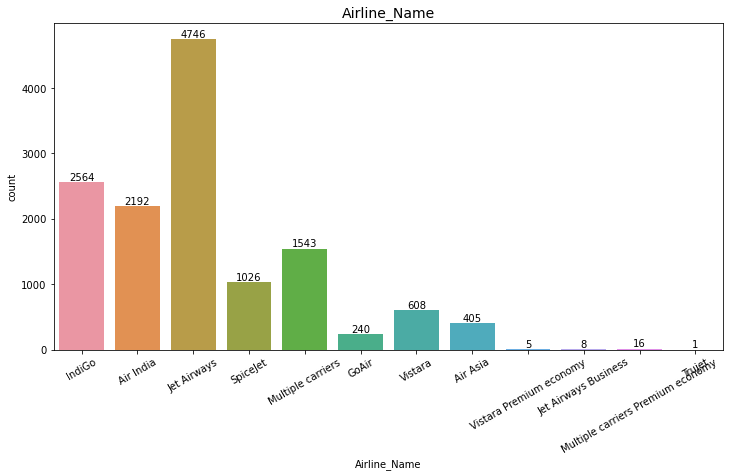

In [60]:
chart('Airline_Name')

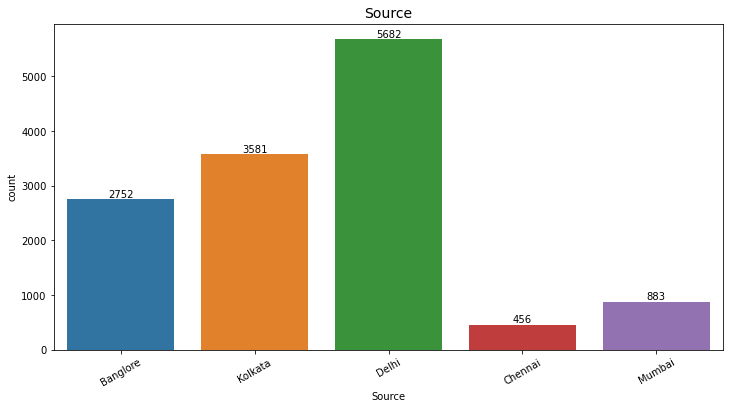

In [61]:
chart('Source')

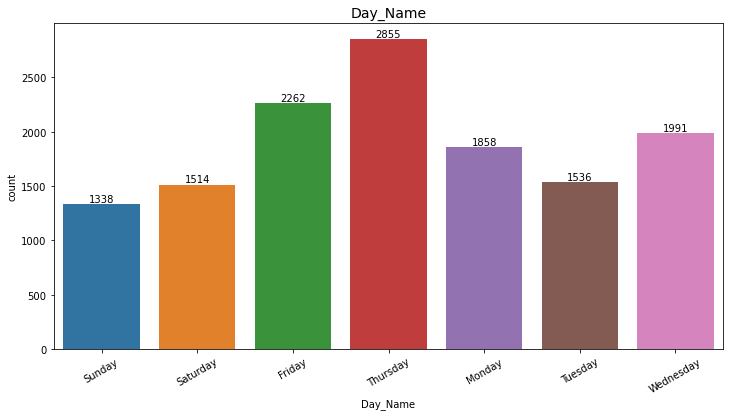

In [62]:
chart('Day_Name')

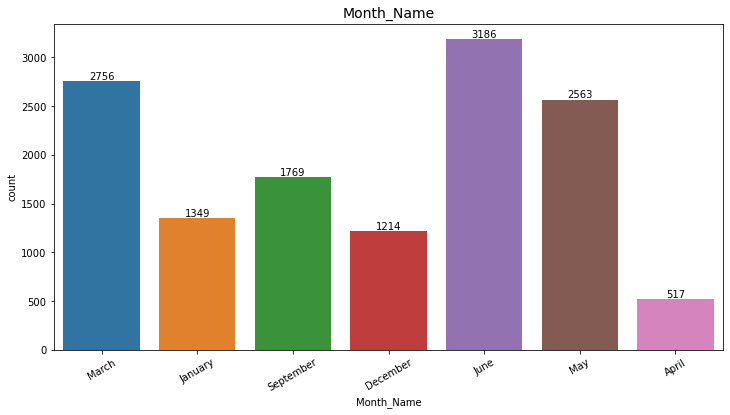

In [63]:
chart('Month_Name')

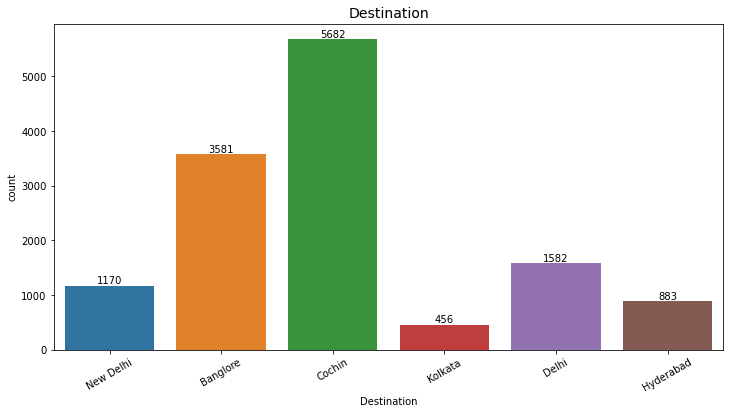

In [64]:
chart('Destination')

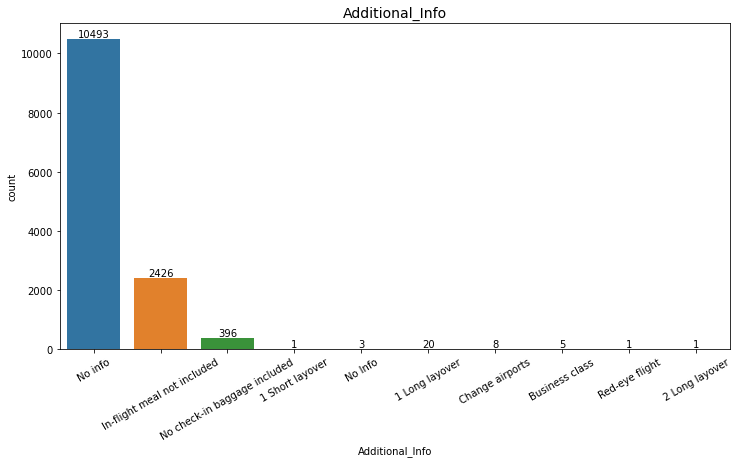

In [66]:
chart('Additional_Info')

Univariate Numerical Analysis

In [77]:
def chart(featur):
    print('Skew:',df[featur].skew())
    plt.figure(figsize=(12,6))
    ax=sns.distplot(df[featur],kde=True)
    plt.title(featur,fontsize=14)
    plt.xticks(rotation=30)

Skew: 2.0264572112744217


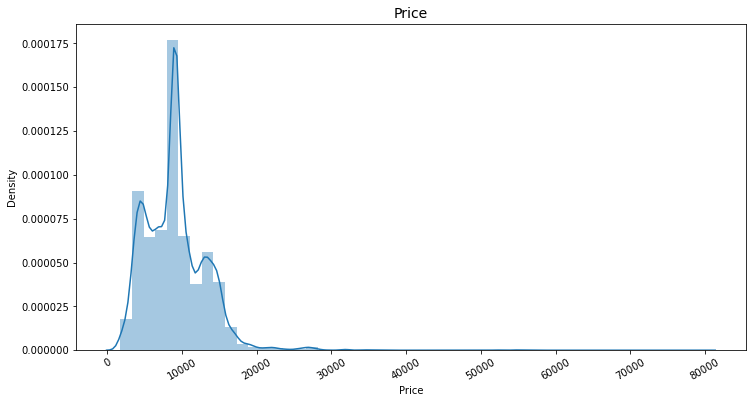

In [78]:
chart('Price')

Skew: 0.8575963289300288


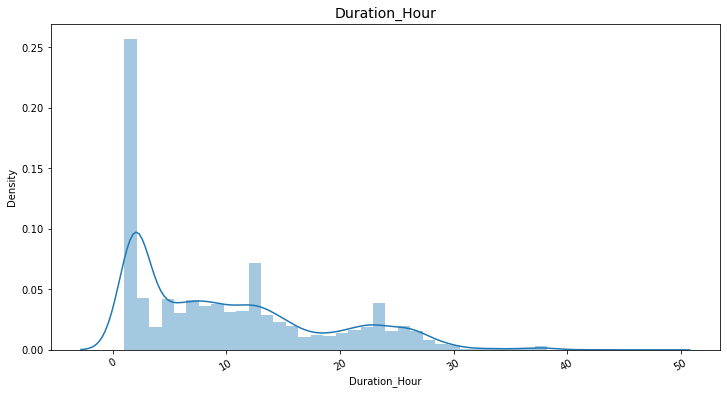

In [79]:
chart('Duration_Hour')

Skew: 0.10908744848641318


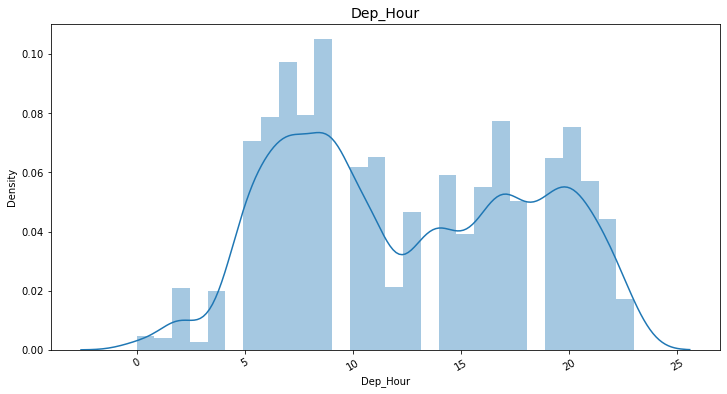

In [80]:
chart('Dep_Hour')

Skew: -0.3845911797559214


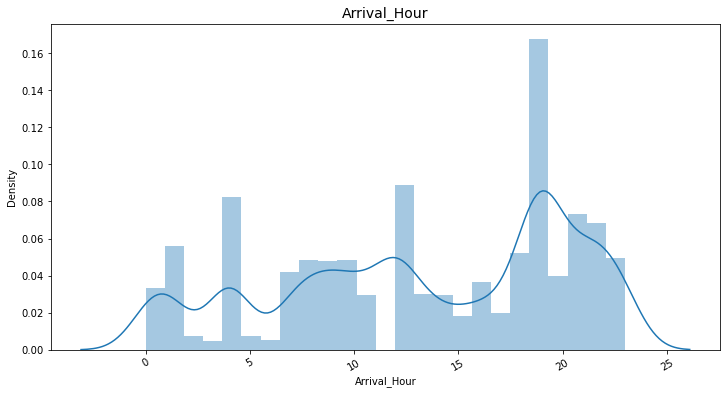

In [81]:
chart('Arrival_Hour')

# Bivariate Analysis

In [3]:
df=pd.read_csv('flight_data_clean.csv')
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)
df.head(5)

,Airline_Name,Source,Destination,Route,Total_Stops,Price,Year,Month,Day,Month_Name,Day_Name,Duration_Hour,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,3897.0,2019,3,24,March,Sunday,2,22,20,1,10,No Info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,7662.0,2019,1,5,January,Saturday,7,5,50,13,15,No Info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,13882.0,2019,9,6,September,Friday,19,9,25,4,25,No Info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,6218.0,2019,12,5,December,Thursday,5,18,5,23,30,No Info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,13302.0,2019,1,3,January,Thursday,4,16,50,21,35,No Info


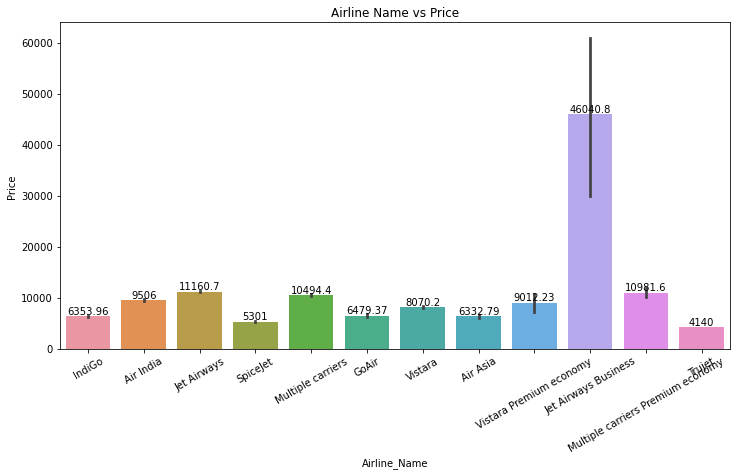

In [6]:
plt.figure(figsize=(12,6))
ax=sns.barplot(data=df,x='Airline_Name',y='Price')
plt.xticks(rotation=30)
plt.title('Airline Name vs Price',fontsize=12)
for i in ax.containers:
    ax.bar_label(i,)

In [20]:
def bi_ana(featur,target):
    plt.figure(figsize=(12,6))
    ax=sns.barplot(data=df,x=df[featur],y=df[target])
    plt.xticks(rotation=30)
    #plt.title(featur,'vs',target,fontsize=12)
    for i in ax.containers:
        ax.bar_label(i,)

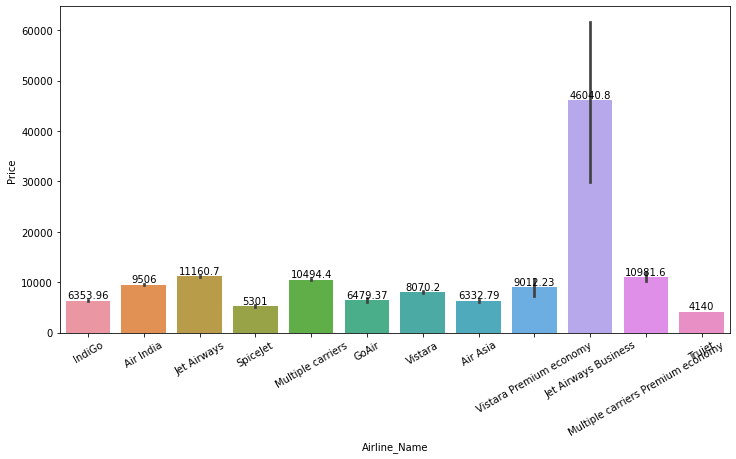

In [21]:
bi_ana('Airline_Name','Price')

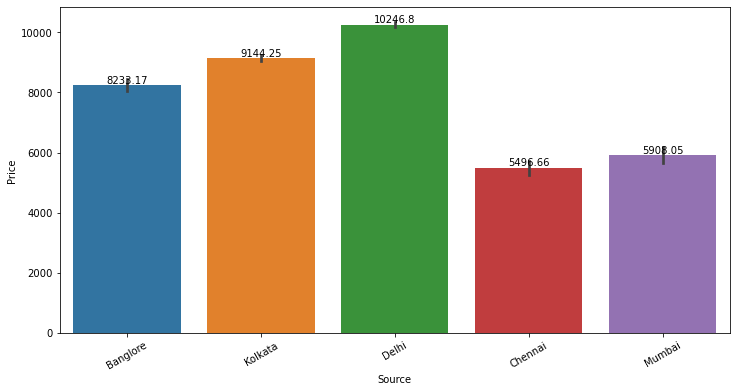

In [22]:
bi_ana('Source','Price')

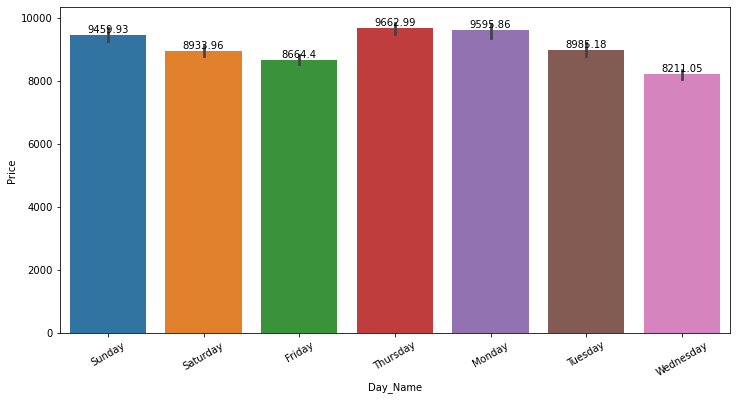

In [23]:
bi_ana('Day_Name','Price')

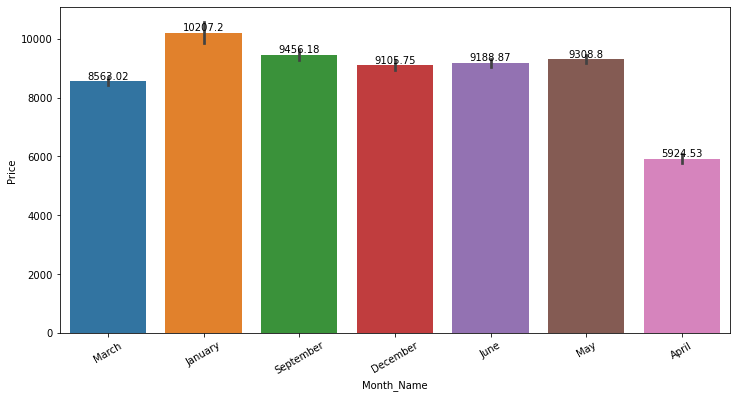

In [24]:
bi_ana('Month_Name','Price')

In [25]:
def bi_ana(featur,target):
    plt.figure(figsize=(12,6))
    ax=sns.scatterplot(data=df,x=df[featur],y=df[target])
    plt.xticks(rotation=30)

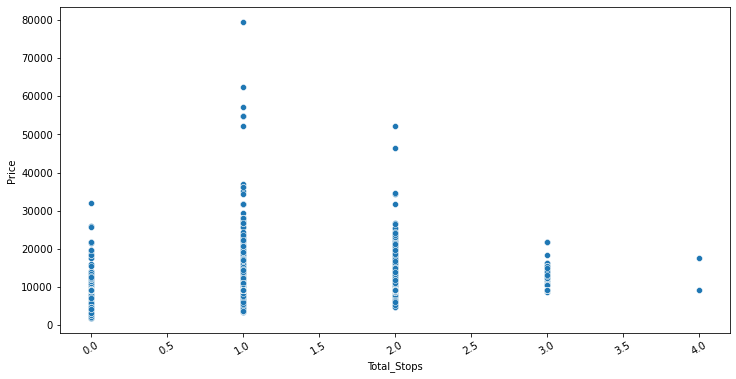

In [26]:
bi_ana('Total_Stops','Price')

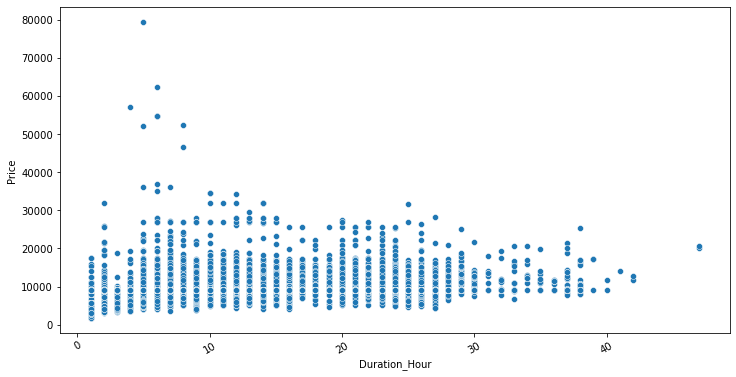

In [27]:
bi_ana('Duration_Hour','Price')

In [29]:
cor=df.corr()
cor

,Total_Stops,Price,Year,Month,Day,Duration_Hour,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
Total_Stops,1.000000,0.540592,NaN,0.068745,-0.027965,0.738982,-0.070709,-0.000116,0.037154,-0.108233
Price,0.540592,1.000000,NaN,0.009535,-0.148685,0.456221,0.006112,-0.021831,0.021585,-0.076809
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,0.068745,0.009535,NaN,1.000000,-0.263645,0.062886,0.024008,0.002174,-0.001319,-0.028378
Day,-0.027965,-0.148685,NaN,-0.263645,1.000000,-0.042197,-0.006490,-0.018639,0.000968,-0.019054
Duration_Hour,0.738982,0.456221,NaN,0.062886,-0.042197,1.000000,-0.001605,-0.013253,0.054582,-0.075281
Dep_Hour,-0.070709,0.006112,NaN,0.024008,-0.006490,-0.001605,1.000000,-0.026674,0.004296,0.067645
Dep_Min,-0.000116,-0.021831,NaN,0.002174,-0.018639,-0.013253,-0.026674,1.000000,0.043967,-0.018133
Arrival_Hour,0.037154,0.021585,NaN,-0.001319,0.000968,0.054582,0.004296,0.043967,1.000000,-0.150636
Arrival_Min,-0.108233,-0.076809,NaN,-0.028378,-0.019054,-0.075281,0.067645,-0.018133,-0.150636,1.000000


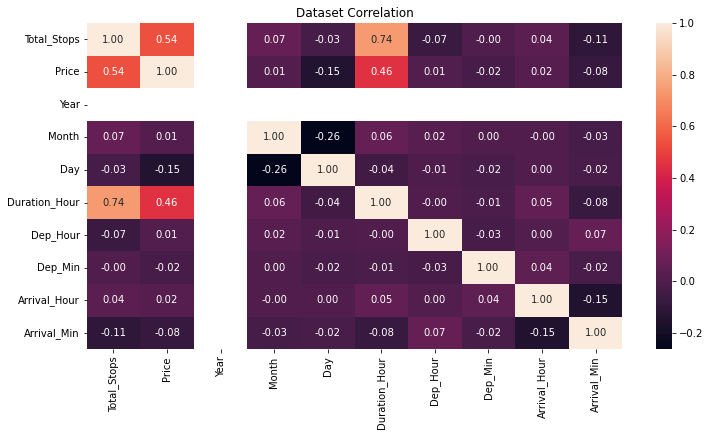

In [34]:
plt.figure(figsize=(12,6))
sns.heatmap(cor,fmt='.2f',annot=True)
plt.title('Dataset Correlation');

<Figure size 864x432 with 0 Axes>

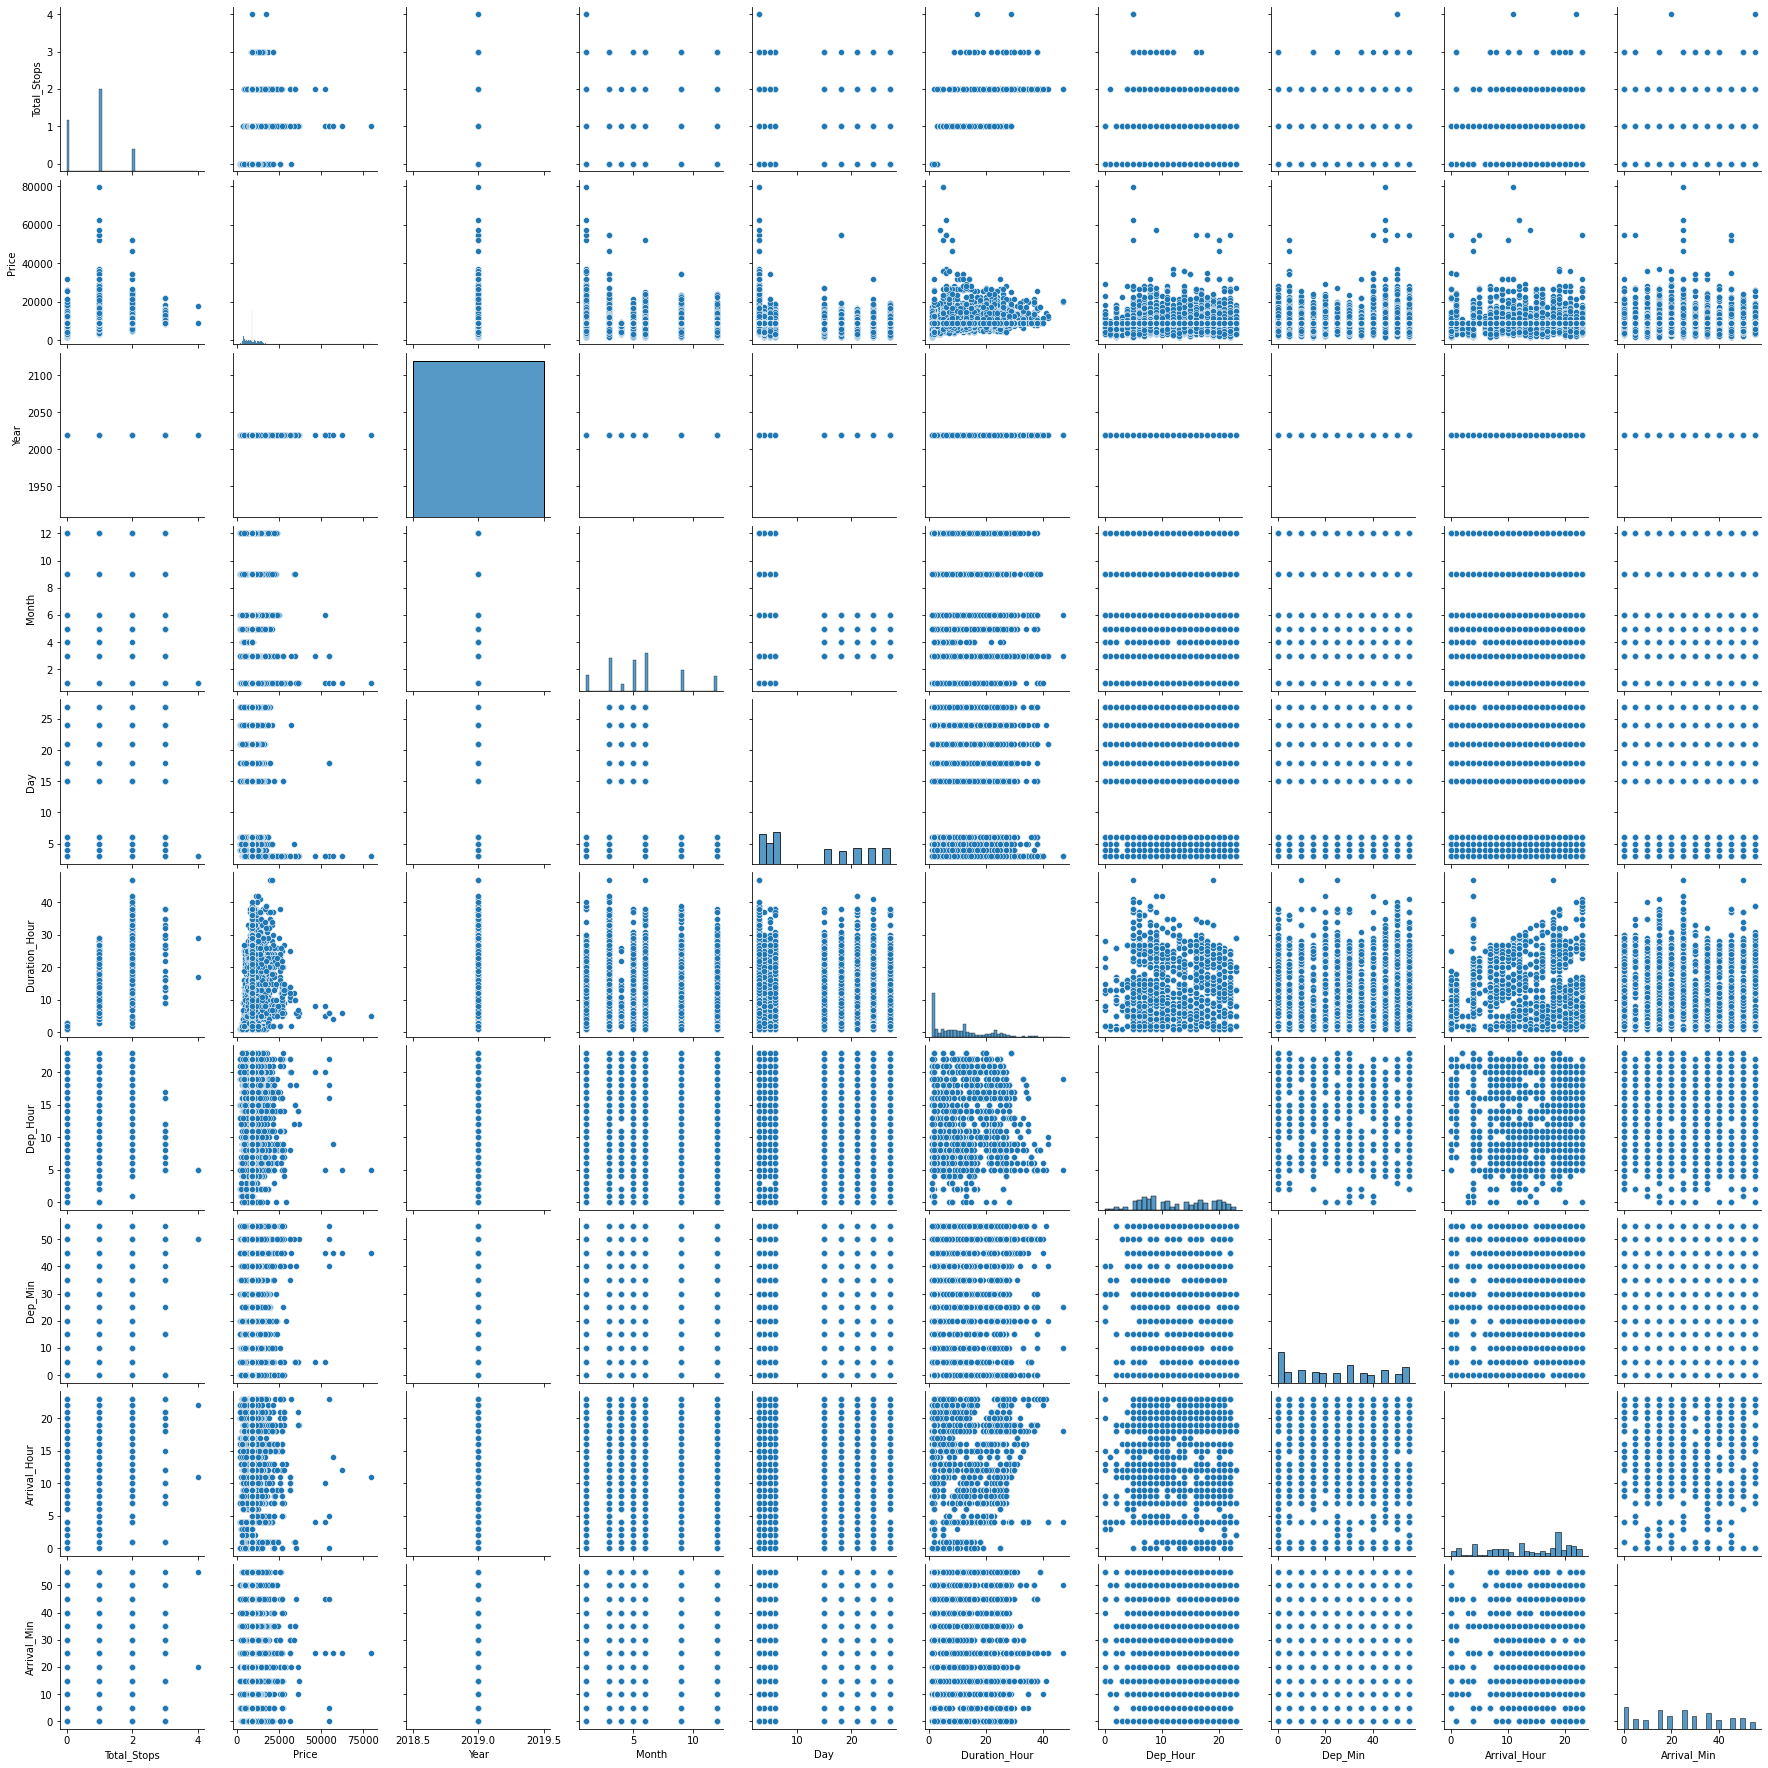

In [36]:
plt.figure(figsize=(12,6))
sns.pairplot(df);

In [40]:
pd.crosstab(df.Info,df.Total_Stops,margins=True,normalize=True)

Total_Stops,0,1,2,3,4,All
Info,,,,,,
Business class,0.000000,0.000374,0.000000,0.000000,0.000000,0.000374
Change airports,0.000000,0.000150,0.000374,0.000000,0.000075,0.000599
No Info,0.269432,0.392991,0.119290,0.004194,0.000075,0.785982
Other,0.055489,0.134941,0.022540,0.000000,0.000000,0.212970
Red-eye flight,0.000075,0.000000,0.000000,0.000000,0.000000,0.000075
All,0.324996,0.528456,0.142205,0.004194,0.000150,1.000000


In [48]:
pd.pivot_table(data=df,index='Day_Name',columns='Source',values='Price',aggfunc='count')

Source,Banglore,Chennai,Delhi,Kolkata,Mumbai
Day_Name,,,,,
Friday,389,76,686,952,159
Monday,456,59,1007,149,187
Saturday,215,50,669,502,78
Sunday,352,44,566,300,76
Thursday,570,91,1277,766,151
Tuesday,453,73,545,333,132
Wednesday,317,63,932,579,100


<Figure size 1080x720 with 0 Axes>

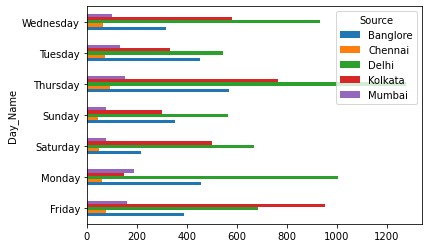

In [50]:
plt.figure(figsize=(15,10))
pd.pivot_table(data=df,index='Day_Name',columns='Source',values='Price',aggfunc='count').plot(kind='barh');

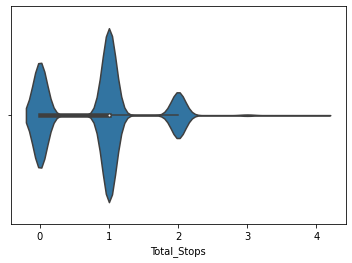

In [52]:
sns.violinplot(x=df['Total_Stops']);

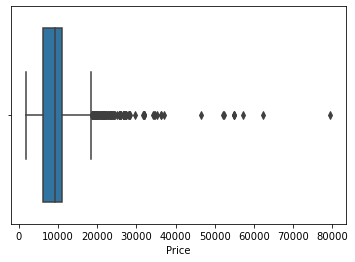

In [54]:
sns.boxplot(x=df['Price']);

In [58]:
df['Price'].describe()

count    13354.000000
mean      9087.064121
std       4124.447805
min       1759.000000
25%       6135.250000
50%       9087.064121
75%      11087.000000
max      79512.000000
Name: Price, dtype: float64

In [57]:
#Price Columns Outier
q1=df['Price'].quantile(0.75)
q1

11087.0

In [59]:
q2=df['Price'].quantile(0.25)
q2

6135.25

In [60]:
iqr=q1-q2
iqr

4951.75

In [61]:
upper=q1+1.5*iqr
lower=q2-1.5*iqr

In [62]:
print('Upper Limit:',upper)
print('Lower Limit:',lower)

Upper Limit: 18514.625
Lower Limit: -1292.375


In [64]:
df[df['Price']>upper]

,Airline_Name,Source,Destination,Route,Total_Stops,Price,Year,Month,Day,Month_Name,Day_Name,Duration_Hour,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Info
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1,22270.0,2019,1,3,January,Thursday,21,8,0,5,5,No Info
20,GoAir,Delhi,Cochin,DEL → BOM → COK,1,19495.0,2019,6,3,June,Monday,5,14,10,19,20,No Info
38,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1,19225.0,2019,6,3,June,Monday,6,7,0,13,15,No Info
123,Air India,Delhi,Cochin,DEL → BOM → COK,1,27430.0,2019,1,3,January,Thursday,20,23,0,19,15,No Info
226,Jet Airways,Delhi,Cochin,DEL → IDR → BOM → COK,2,18799.0,2019,3,3,March,Sunday,37,5,25,18,50,No Info
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10495,Air India,Delhi,Cochin,DEL → BHO → BOM → COK,2,18736.0,2019,9,3,September,Tuesday,13,5,55,19,15,No Info
10511,Air India,Banglore,New Delhi,BLR → BOM → BHO → DEL,2,26480.0,2019,1,3,January,Thursday,26,6,45,9,25,Other
10561,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1,20800.0,2019,1,3,January,Thursday,18,14,5,9,0,No Info
10625,Jet Airways,Delhi,Cochin,DEL → JDH → BOM → COK,2,19644.0,2019,9,5,September,Thursday,7,11,40,19,0,Other


In [65]:
df[df['Price']<lower]

,Airline_Name,Source,Destination,Route,Total_Stops,Price,Year,Month,Day,Month_Name,Day_Name,Duration_Hour,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Info
